In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#Import dataset
data = pd.read_csv("shopping_trends.csv")

In [5]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
 #general information od dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [7]:
#numerical summarty
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
#check for na values
data.isna().sum()


Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [9]:
#check for duplicates
data.duplicated().sum()

np.int64(0)

In [16]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Male', 'Female'],
      dtype='object')

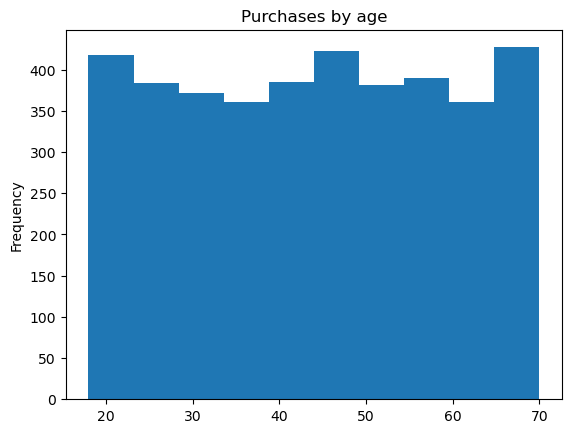

In [23]:
# Histogram visualizing purchasing frequency by Age
data["Age"].plot(kind = "hist")
plt.title("Purchases by age")
plt.show()

This visualization highlights the distribution of customer purchase frequency by age, offering a clear comparison of representation within each group. By structuring the data into a histogram,the chart would highlight the frequency of occurrences across different ranges, making it easy to see where concentrations are highest and where gaps exist. The visualization not only makes disparities immediately visible but also provides a foundation for informed discussions on organizational planning. Its clarity and structure ensure that stakeholders can quickly grasp patterns and identify areas requiring strategic attention.

In [38]:
data.groupby("Season")["Purchase Amount (USD)"].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

This visualization summarizes total purchase amounts across different seasons, providing a clear view of consumer spending patterns over time. By grouping transactions by season, the chart highlights variations in purchasing behavior, such as peaks during high-demand periods and declines in off-seasons. These insights are valuable for identifying revenue drivers, planning inventory, and aligning marketing strategies with seasonal trends. This ensures that stakeholders can quickly grasp where spending is concentrated and how it shifts throughout the year.


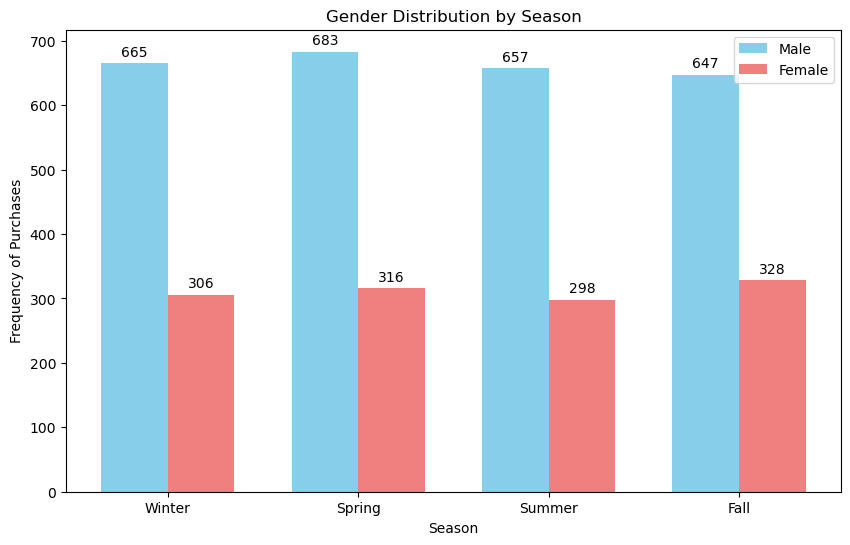

In [24]:
# Indicator columns
data["Male"] = (data["Gender"] == "Male")
data["Female"] = (data["Gender"] == "Female")


# Get all seasons
labels = data["Season"].unique()
x = np.arange(len(labels))  # positions for groups
width = 0.35

# Aggregate counts by Season
male_counts = data[data["Male"]].groupby("Season").size()
female_counts = data[data["Female"]].groupby("Season").size()

# Align counts with labels (fill missing seasons with 0)
male_counts = [male_counts.get(season, 0) for season in labels]
female_counts = [female_counts.get(season, 0) for season in labels]

# Plot grouped bars
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, male_counts, width, label="Male", color="skyblue")
rects2 = ax.bar(x + width/2, female_counts, width, label="Female", color="lightcoral")

# Labels and legend
ax.set_xlabel("Season")
ax.set_ylabel("Frequency of Purchases")
ax.set_title("Gender Distribution by Season")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels on top of bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),  # offset
                    textcoords="offset points",
                    ha="center", va="bottom")

plt.show()

The grouped bar chart illustrates the frequency of purchases segmented by gender across different seasons. By plotting male and female counts side by side for each season, the visualization enables a direct comparison of purchasing behavior between genders. An example of insights that can be drawn are:

- Gender Differences: The relative height of male versus female bars highlights disparities in purchasing behavior. A consistently higher male/female bar across seasons would suggest that specific gender is the primary driver of seasonal purchases, whereas balanced bars indicate more equal participation.
-  Strategic Planning: The clear labeling and annotation of values above each bar make the chart presentation-ready, allowing stakeholders to quickly grasp both absolute numbers and relative differences. This supports evidence-based decisions in areas such as inventory management, promotional timing, and customer segmentation.






In [50]:
#group by payment method ,sum of purchase amount
data.groupby("Payment Method")["Purchase Amount (USD)"].sum()

Payment Method
Bank Transfer    37123
Cash             38833
Credit Card      42567
Debit Card       37118
PayPal           37449
Venmo            39991
Name: Purchase Amount (USD), dtype: int64

This analysis reveals the amount of money  moved by each transaction channel. Credit cards account for the highest purchase volume, underscoring their role as the dominant payment option. Venmo and cash follow closely, reflecting the growing adoption of digital wallets alongside the continued relevance of traditional methods. PayPal and bank transfers contribute moderate volumes, while debit cards show comparable activity to bank transfers, suggesting balanced usage across secure and accessible platforms. These findings emphasize the importance of supporting multiple payment methods to meet customer expectations, while also pointing to opportunities for optimizing digital payment experiences where adoption is strongest

In [45]:
data["Preferred Payment Method"].value_counts().sort_values(ascending=False).head(1)

Preferred Payment Method
PayPal    677
Name: count, dtype: int64

This shows that despite not generating the most revenue,Paypal is the most popular means of payment among consumers and therefore should always be available  

In [22]:
#Grouping data by category and calculating the mean
data.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending = False)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

This analysis of purchase amounts by product category reveals a relatively balanced distribution of consumer spending, with footwear leading slightly at just over 60 USD on average. Clothing and accessories follow closely, indicating that these categories share comparable importance in driving overall revenue. Outerwear, while marginally lower, still represents a significant portion of purchases, suggesting consistent demand across all segments. The narrow range between categories highlights a diversified customer interest, underscoring the need for a broad product mix rather than reliance on a single category. These insights can guide merchandising strategies, ensuring that inventory and marketing efforts remain aligned with the evenly distributed purchasing behavior observed.

In [27]:
#sort data by review rating
data = data.sort_values("Review Rating" , ascending = False)
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Male,Female
776,777,49,Male,Shirt,Clothing,60,Alabama,M,Maroon,Spring,...,Yes,PayPal,Standard,Yes,Yes,8,Venmo,Every 3 Months,True,False
556,557,40,Male,Coat,Outerwear,90,Montana,L,Indigo,Winter,...,Yes,Credit Card,Store Pickup,Yes,Yes,21,Cash,Fortnightly,True,False
2888,2889,70,Female,Hoodie,Clothing,42,Wisconsin,L,Green,Spring,...,No,Venmo,2-Day Shipping,No,No,25,Debit Card,Quarterly,False,True
1486,1487,25,Male,Sneakers,Footwear,73,Idaho,S,Yellow,Spring,...,No,Cash,Free Shipping,Yes,Yes,23,Venmo,Every 3 Months,True,False
660,661,50,Male,Coat,Outerwear,79,Montana,M,Olive,Fall,...,Yes,Debit Card,2-Day Shipping,Yes,Yes,39,Credit Card,Quarterly,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,41,Male,Belt,Accessories,42,Connecticut,M,Yellow,Winter,...,Yes,PayPal,2-Day Shipping,Yes,Yes,11,Venmo,Annually,True,False
835,836,35,Male,Boots,Footwear,26,Maryland,L,Indigo,Summer,...,Yes,Debit Card,Next Day Air,Yes,Yes,21,Debit Card,Weekly,True,False
2491,2492,63,Male,Handbag,Accessories,47,North Carolina,M,Magenta,Spring,...,No,Debit Card,Express,No,No,15,Bank Transfer,Monthly,True,False
3230,3231,49,Female,Sneakers,Footwear,49,Kansas,M,Olive,Summer,...,No,Venmo,Next Day Air,No,No,38,Debit Card,Annually,False,True


By sorting the dataset according to review ratings in descending order, we highlight the products that received the most positive customer feedback. This arrangement allows stakeholders to immediately identify top-performing items, which can serve as benchmarks for quality and customer satisfaction. At the same time, it provides a clear view of how other products compare against the highest-rated entries, making it easier to spot trends in consumer preferences and areas for improvement. This structured approach ensures that decision-makers can focus on the strongest performers first while also recognizing opportunities to enhance lower-rated offerings.

In [47]:
#pivot table for location vs item purchase,mean = purchase amount 
pd.pivot_table(data, values = "Purchase Amount (USD)", index = "Location", columns = "Item Purchased",aggfunc="mean")

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.000000,26.500000,52.000000,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.200000,54.333333,49.000000,68.666667,79.500000,93.500000,62.666667,40.500000,52.500000
Alaska,74.600000,76.750000,67.500000,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.500000,80.000000,76.666667,87.333333,73.333333,74.250000,83.000000,50.333333,56.750000
Arizona,48.600000,84.500000,61.000000,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.000000,87.000000,46.000000,68.500000,78.500000,61.000000,66.000000,70.400000,62.000000
Arkansas,90.000000,55.000000,66.000000,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.000000,59.500000,95.000000,44.500000,69.000000,60.500000,56.000000,71.500000,52.000000
California,57.400000,61.666667,39.500000,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.800000,NaN,63.333333,56.000000,73.000000,83.000000,69.400000,42.000000,69.000000
Colorado,57.000000,68.500000,55.000000,NaN,46.000000,39.750000,64.500000,51.250000,61.333333,50.500000,...,68.000000,64.500000,67.500000,95.000000,41.200000,53.500000,NaN,34.000000,58.000000,59.000000
Connecticut,60.000000,47.666667,67.400000,64.250000,44.500000,65.000000,63.000000,53.500000,22.000000,63.000000,...,68.250000,62.333333,51.750000,59.500000,54.000000,NaN,61.000000,43.000000,NaN,39.000000
Delaware,33.000000,41.500000,42.200000,44.500000,57.500000,46.000000,72.200000,51.000000,57.400000,79.333333,...,54.000000,45.333333,58.200000,43.000000,66.000000,39.500000,80.000000,45.500000,35.000000,66.666667
Florida,59.000000,94.000000,31.000000,51.500000,51.166667,48.500000,51.666667,67.000000,54.000000,64.250000,...,58.500000,66.333333,26.000000,89.500000,44.500000,64.000000,33.500000,59.000000,56.000000,56.000000


This pivot table provides a detailed breakdown of average purchase amounts by location and item category, offering a multidimensional view of consumer behavior. By structuring the data with locations as rows and items purchased as columns, the visualization highlights spending patterns across different regions. This allows us to identify which products generate higher average purchase values in specific locations, revealing both geographic preferences and product-level performance. Such insights are critical for tailoring marketing strategies, optimizing inventory distribution, and aligning promotional efforts with regional demand. The table’s format ensures stakeholders can easily compare categories side by side, making it a powerful tool for uncovering actionable trends in purchasing behavior.

In [52]:
#Group by discount applied,mean review rating
data.groupby("Discount Applied")["Review Rating"].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

This analysis calculates the average review rating for purchases segmented by whether a discount was applied. By comparing these mean values, the visualization reveals how discounts influence customer satisfaction. If ratings are higher when discounts are applied, it suggests that promotional pricing positively impacts perceived value and overall customer experience. Conversely, if ratings are lower, it may indicate that discounted items differ in quality or that expectations are not fully met. This insight is valuable for evaluating the effectiveness of discount strategies, helping stakeholders balance short-term sales incentives with long-term customer satisfaction.

In [53]:
#Group by color,count occurances of each category
data.groupby("Color")["Category"].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

This analysis groups products by color and then counts the frequency of each category within those color groups. The resulting breakdown highlights which product categories are most commonly associated with specific colors, offering insights into both design trends and consumer preferences. For example, if footwear dominates within darker colors while accessories appear more frequently in brighter tones, this suggests a correlation between product type and color choice. Such findings can inform merchandising decisions, guide inventory planning, and support targeted marketing campaigns by aligning product offerings with the color-category combinations most favored by customers. Ultimately, this view provides a granular understanding of how color influences purchasing behavior across categories

In [30]:
#Group by season,mean of review ratings
data.groupby("Season")["Review Rating"].mean()

Season
Fall      3.729949
Spring    3.790591
Summer    3.725654
Winter    3.752111
Name: Review Rating, dtype: float64

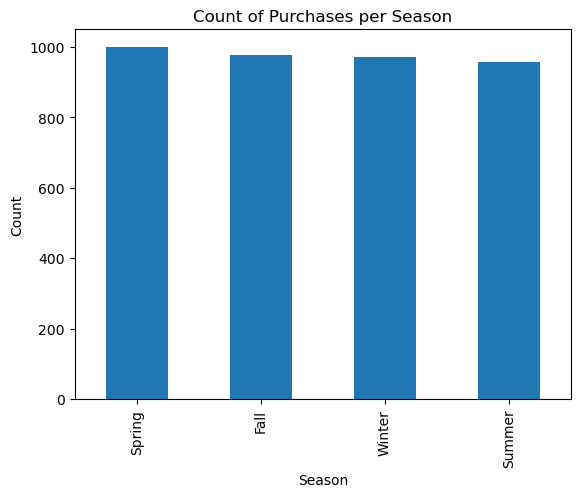

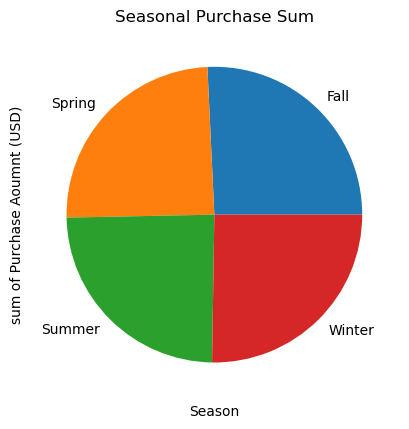

In [ ]:
data["Season"].value_counts().plot(kind="bar")
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Count of Purchases per Season")
plt.show()

data.groupby("Season")["Purchase Amount (USD)"].mean().plot(kind = "pie")
plt.xlabel("Season")
plt.ylabel("sum of Purchase Aoumnt (USD)")
plt.title("Seasonal Purchase Sum")
plt.show()

This analysis provides a comprehensive view of seasonal purchasing behavior by combining customer satisfaction, purchase frequency, and spending patterns. The average review ratings by season highlight how customer experiences vary throughout the year, offering insight into whether certain seasons are associated with higher satisfaction. The bar chart of purchase counts reveals the relative volume of transactions per season, making it clear which periods drive the most activity. Finally, the pie chart of average purchase amounts illustrates how spending is distributed across seasons, showing whether customers tend to spend more during specific times of the year. Together, these visualizations provide a multi-dimensional perspective: they not only identify peak seasons for sales but also connect them to customer sentiment and spending intensity. This enables stakeholders to align marketing, inventory, and service strategies with the periods that matter most to both revenue and customer satisfaction.

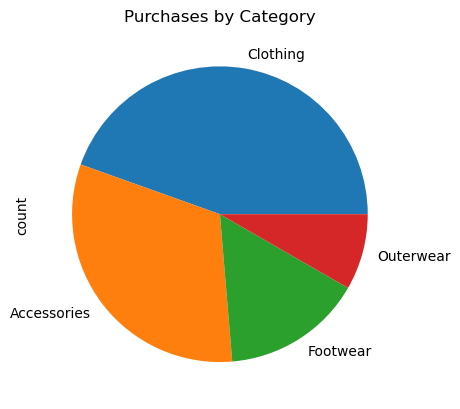

In [63]:
data["Category"].value_counts().plot(kind="pie")
plt.title("Purchases by Category")
plt.show()

This pie chart illustrates the proportion of purchases across product categories, providing a clear snapshot of consumer preferences. By visualizing the relative share of each category, the chart highlights which segments dominate overall sales and which represent smaller portions of customer demand. For instance, if footwear and clothing occupy the largest slices, it suggests these categories are the primary drivers of revenue, while accessories and outerwear contribute more modestly. This distribution is valuable for guiding merchandising and marketing strategies, ensuring that resources are allocated to the categories with the greatest impact while still maintaining a balanced product mix to serve diverse customer interests

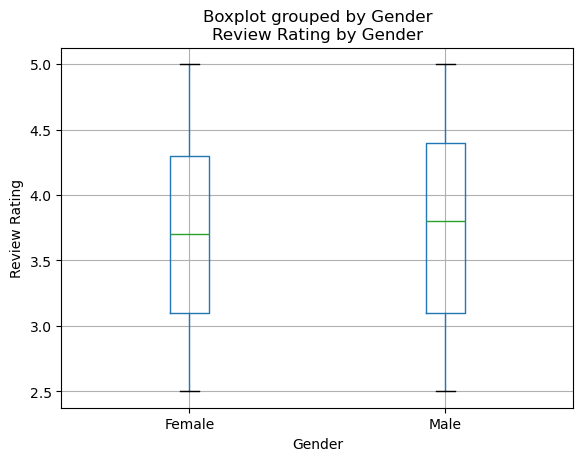

In [66]:
#boxplot for review raitings based on gender
data.boxplot(column = "Review Rating", by = "Gender")
plt.xlabel("Gender")
plt.ylabel("Review Rating")
plt.title("Review Rating by Gender")
plt.show()

This boxplot compares review ratings across genders, providing a clear view of the distribution, central tendency, and variability in customer feedback. The visualization highlights median ratings for each gender, while also showing the spread of values and potential outliers. If one gender consistently exhibits higher median ratings, it suggests differences in satisfaction levels or expectations between groups. Conversely, overlapping ranges indicate similar experiences across genders. The presence of outliers may point to unique cases of exceptionally positive or negative reviews that warrant further investigation. Overall, this chart offers a concise yet powerful way to assess whether gender plays a role in shaping customer perceptions and satisfaction trends

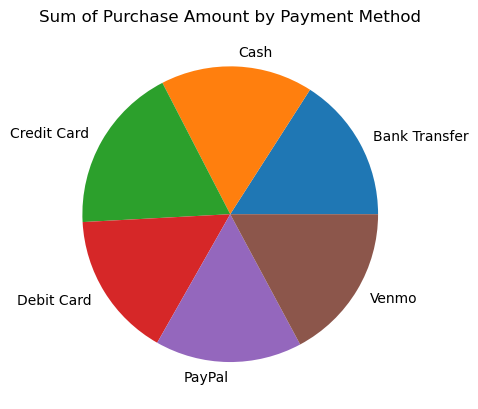

In [76]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum().plot(kind="pie")
plt.title("Sum of Purchase Amount by Payment Method")
plt.ylabel("")
plt.show()

This pie chart illustrates the total purchase amounts segmented by payment method, offering a clear view of how customers prefer to transact. The visualization highlights the relative contribution of each method to overall revenue, with credit cards, cash, and digital wallets such as Venmo and PayPal likely representing the largest slices. Bank transfers and debit cards contribute more modest shares, underscoring their continued but less dominant role in consumer spending. By visualizing these proportions, the chart emphasizes the importance of supporting diverse payment options while also pointing to opportunities for optimizing digital payment channels where adoption is strongest. These insights are critical for aligning financial operations and customer experience strategies with actual consumer behavior

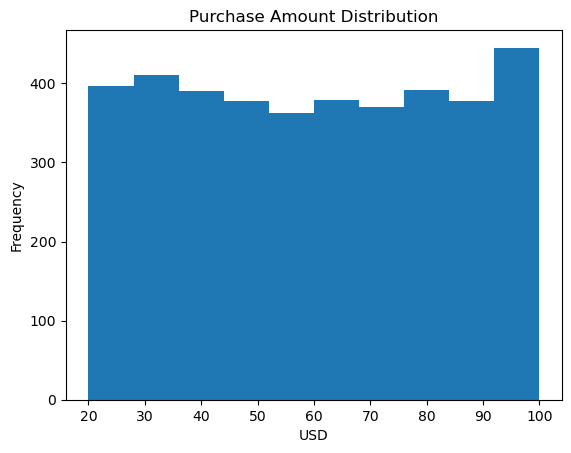

In [67]:
data["Purchase Amount (USD)"].plot(kind = "hist", bins = 10)
plt.xlabel("USD")
plt.ylabel("Frequency")
plt.title("Purchase Amount Distribution")
plt.show()

This histogram illustrates the distribution of purchase amounts, providing a clear view of how frequently transactions fall within specific ranges. By dividing the data into ten bins, the chart highlights spending patterns, such as whether purchases cluster around lower, mid-range, or higher amounts. Peaks in the histogram indicate the most common transaction values, while the spread of the bars reveals the variability in customer spending behavior. This visualization is particularly useful for identifying typical purchase sizes, spotting outliers, and understanding the overall shape of consumer demand. Such insights can guide pricing strategies, promotional offers, and inventory planning by aligning business decisions with the spending tendencies of the customer base

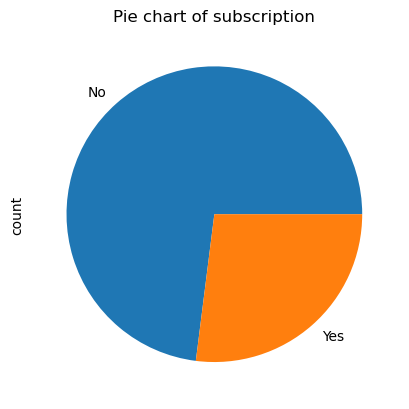

In [33]:
data["Subscription Status"].value_counts().plot(kind = "pie")
plt.title("Pie chart of subscription")
plt.show()

This pie chart illustrates the distribution of customers by subscription status, providing a clear snapshot of engagement levels within the dataset. The visualization highlights the proportion of active versus inactive subscribers, making it easy to identify the dominant group. A larger share of active subscriptions would suggest strong customer retention and loyalty, while a higher proportion of inactive or non-subscribers may point to opportunities for re-engagement strategies. By visualizing these segments, the chart emphasizes the importance of monitoring subscription dynamics, as they directly impact recurring revenue, customer lifetime value, and long-term business sustainability